In [1]:
from openbabel import pybel
import os
import re
import argparse
import numpy as np
import pandas as pd
from rdkit.Chem import AllChem
from rdkit import Chem
from rdkit.Chem.rdMolAlign import AlignMol
import copy
from openbabel import openbabel as ob

In [2]:
directory = "/home/jpam/google_drive/UFMG/TCC/bianca/moleculas"

In [3]:
files = [f for f in os.listdir(directory) if f.endswith("mol2")]

In [4]:
mols = [pybel.readfile('mol2',os.path.join(directory,f)) 
	    for f in files]

In [5]:
rdmols = []
for mol in mols:
    for c in mol:
        rdmol = Chem.MolFromMolBlock(c.write('mol'),removeHs=False)
    rdmols.append(copy.copy(rdmol))

In [6]:
rdmols

In [11]:
smarts = "[#6]1-[#6](-[#6](-[#6](-[#6](-[#6]-1-[#1])-[#1])-[#6](-[#6](-[#7](-[#1])-[#1])-[#8])-[#7](-[#6](-[#6](-[#6](-[#6](-[#6](-[#6](-[#7](-[#1])-[#1])(-[#1])-[#1])(-[#1])-[#1])(-[#1])-[#1])(-[#1])-[#1])(-[#7](-[#6](-[#6](-[#6](-[#6]-[#6]-[#1])(-[#1])-[#1])(-[#7](-[#6](-[#6])-[#8])-[#1])-[#1])-[#8])-[#1])-[#1])-[#8])-[#1])-[#1])-[#1]"

In [12]:
patt = Chem.MolFromSmarts(smarts)

In [16]:
refMol = rdmols[0]
refAtoms = list(refMol.GetSubstructMatch(patt))
mols_aligned = [pybel.readstring("mol",Chem.MolToMolBlock(refMol))]
for i,prbMol in enumerate(rdmols[1:]):
    try:
        prbAtoms = list(prbMol.GetSubstructMatch(patt))
        alinhamento = AlignMol(prbMol,refMol,atomMap=list(zip(prbAtoms,refAtoms)))
        mols_aligned.append(pybel.readstring("mol",Chem.MolToMolBlock(prbMol)))
    except Exception as e:
        print(prbMol.GetProp("_Name"))


c18-t2.mol2
c75-t2.mol2
c68-t2.mol2


In [ ]:
for i,(m1,m2) in enumerate(zip(mols_aligned,mols)):
    for (a1,a2) in zip(m1,m2):
        print(a1,a2)
        a1.partialcharge = a2.partialcharge
    m1.write("mol2",files[i][:-4]+"_aligned.mol2",True)

In [ ]:
obConversion = ob.OBConversion()

In [ ]:
obConversion.SetInAndOutFormats("g09","mol2")

In [ ]:
obmols = []
for i in range(len(files)):
    obmol = ob.OBMol()
    obConversion.ReadFile(obmol, os.path.join(directory,df.iloc[i,0]+".log"))
    obmols.append(obmol)

In [ ]:
os.path.basename(obmols[0].GetTitle())

In [ ]:
for at in ob.OBMolAtomIter(obmols[0]):
    print(at.GetPartialCharge())

In [ ]:
for m1,m2 in zip(mols_aligned,obmols):
    for (a1,a2) in zip(ob.OBMolAtomIter(m1.OBMol),ob.OBMolAtomIter(m2)):
#         a1.partialcharge = a2.partialcharge
        a1.SetPartialCharge(a2.GetPartialCharge())
    m1.write("mol2",m1.title[:-4]+"_aligned.mol2",True)

In [10]:
list(refMol.GetSubstructMatch(patt))

ArgumentError: Python argument types in
    Mol.GetSubstructMatch(Mol, str)
did not match C++ signature:
    GetSubstructMatch(RDKit::ROMol self, RDKit::MolBundle query, RDKit::SubstructMatchParameters params)
    GetSubstructMatch(RDKit::ROMol self, RDKit::ROMol query, RDKit::SubstructMatchParameters params)
    GetSubstructMatch(RDKit::ROMol self, RDKit::MolBundle query, bool useChirality=False, bool useQueryQueryMatches=False)
    GetSubstructMatch(RDKit::ROMol self, RDKit::ROMol query, bool useChirality=False, bool useQueryQueryMatches=False)

In [18]:
img=Chem.Draw.MolsToGridImage(rdmols,subImgSize=(200,200))    

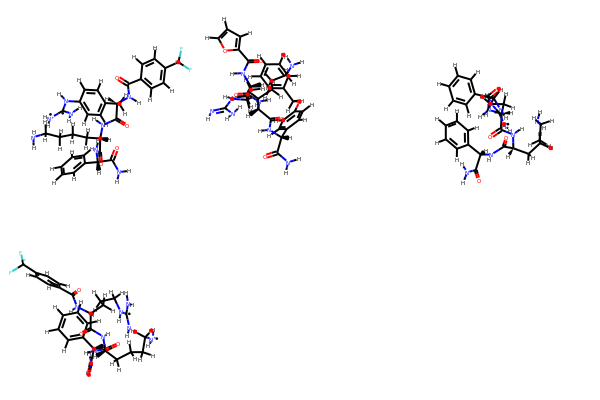

In [19]:
img